<a href="https://colab.research.google.com/github/nivi62/machine-learning/blob/main/solarRadiationforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Pp.csv')
data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,0.26,0.76
1,1475229023,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,0.26,0.76
2,1475228726,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,0.26,0.76
3,1475228421,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,0.26,0.76
4,1475228124,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,0.26,0.76


In [ ]:
data_sun = data[['UNIXTime','Radiation']].iloc[:31000,:]
data_sun.set_index('UNIXTime',drop=True,inplace=True)
data_sun.tail()

,Radiation
UNIXTime,
1481318139,120.52
1481317850,107.32
1481317540,144.85
1481317251,179.73
1481316953,193.00


In [ ]:
MMS = MinMaxScaler()
data_sun[data_sun.columns] = MMS.fit_transform(data_sun)
data_sun.head()

,Radiation
UNIXTime,
1475229326,0.000062
1475229023,0.000062
1475228726,0.000075
1475228421,0.000062
1475228124,0.000037


In [ ]:
training_size = round(len(data_sun) * 0.80)
train_data = data_sun[:training_size]
test_data  = data_sun[training_size:]

In [ ]:
def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
X_train, y_train = create_sequence(train_data,100)
X_val, y_val = create_sequence(test_data,100)

print(X_train.shape, X_val.shape)

(24700, 100, 1) (6100, 100, 1)


In [ ]:
from keras import backend
def rmse(y_true, y_pred):
 return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units = 32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error',rmse])


In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/10
772/772 [==============================] - 56s 66ms/step - loss: 0.0039 - mean_absolute_error: 0.0316 - rmse: 0.0316 - val_loss: 0.0018 - val_mean_absolute_error: 0.0199 - val_rmse: 0.0199
Epoch 2/10
772/772 [==============================] - 52s 68ms/step - loss: 0.0031 - mean_absolute_error: 0.0264 - rmse: 0.0264 - val_loss: 0.0016 - val_mean_absolute_error: 0.0203 - val_rmse: 0.0203
Epoch 3/10
772/772 [==============================] - 48s 63ms/step - loss: 0.0030 - mean_absolute_error: 0.0257 - rmse: 0.0257 - val_loss: 0.0015 - val_mean_absolute_error: 0.0170 - val_rmse: 0.0170
Epoch 4/10
772/772 [==============================] - 48s 62ms/step - loss: 0.0030 - mean_absolute_error: 0.0249 - rmse: 0.0249 - val_loss: 0.0015 - val_mean_absolute_error: 0.0156 - val_rmse: 0.0156
Epoch 5/10
772/772 [==============================] - 52s 67ms/step - loss: 0.0029 - mean_absolute_error: 0.0249 - rmse: 0.0249 - val_loss: 0.0015 - val_mean_absolute_error: 0.0183 - val_rmse: 0.0183


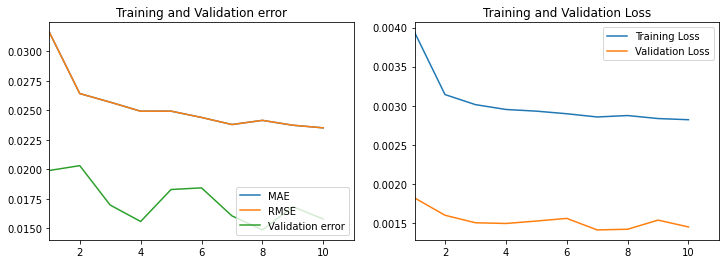

In [ ]:
rmse = history.history['rmse']
mae = history.history['mean_absolute_error']
val_error = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_error)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='MAE')
plt.plot(epochs_range, rmse, label='RMSE')
plt.plot(epochs_range, val_error, label='Validation error')
plt.legend(loc='lower right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("RMSE values : ",rmse)
print("MAE values : ",mae)

RMSE values :  [0.03162887692451477, 0.026430213823914528, 0.025702428072690964, 0.024934345856308937, 0.024939879775047302, 0.024405810981988907, 0.02380518801510334, 0.024158405140042305, 0.0237469132989645, 0.02352357655763626]
MAE values :  [0.03162887692451477, 0.026430213823914528, 0.025702428072690964, 0.024934345856308937, 0.024939879775047302, 0.024405810981988907, 0.02380518801510334, 0.024158405140042305, 0.0237469132989645, 0.02352357655763626]


In [ ]:
test_predicted = model.predict(X_val)

191/191 [==============================] - 4s 17ms/step


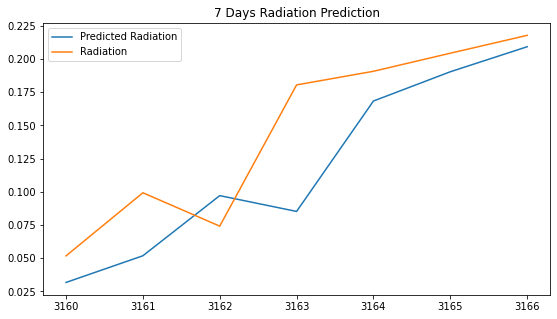

In [ ]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(3160,3167),test_predicted[3160:3167],label='Predicted Radiation')
plt.plot(np.arange(3160,3167),y_val[3160:3167],label="Radiation")
plt.title('7 Days Radiation Prediction')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score
print("Accuracy : ",r2_score(y_val, test_predicted))

Accuracy :  0.9490880939689
